In [1]:
import numpy as np
import matplotlib.pyplot as plt
from typing import List, Tuple, Union, Callable
from tqdm import tqdm

from lattice import SquareLattice, BrickwallLattice
import qutip as qu

In [5]:
sq = SquareLattice(L=8, t_hop=1j, E_amplitude=0.1, E_dir=np.array([1, 0]), h=0.1, steps=1000, initial_occupation=0.5)
sq.evolve(progress_bar=True)

Creating Hamiltonians...
Done.
Calculating energy eigenstates...
Done.
50 % of states were set as initially occupied.
10.0%. Run time:  23.35s. Est. time left: 00:00:03:29
20.0%. Run time:  46.85s. Est. time left: 00:00:03:07
30.0%. Run time:  69.76s. Est. time left: 00:00:02:42
40.0%. Run time:  93.07s. Est. time left: 00:00:02:19
50.1%. Run time: 118.48s. Est. time left: 00:00:01:58
60.1%. Run time: 145.46s. Est. time left: 00:00:01:36
70.1%. Run time: 170.33s. Est. time left: 00:00:01:12
80.1%. Run time: 206.51s. Est. time left: 00:00:00:51
90.1%. Run time: 242.58s. Est. time left: 00:00:00:26
100.0%. Run time: 278.57s. Est. time left: 00:00:00:00
Total run time: 278.57s


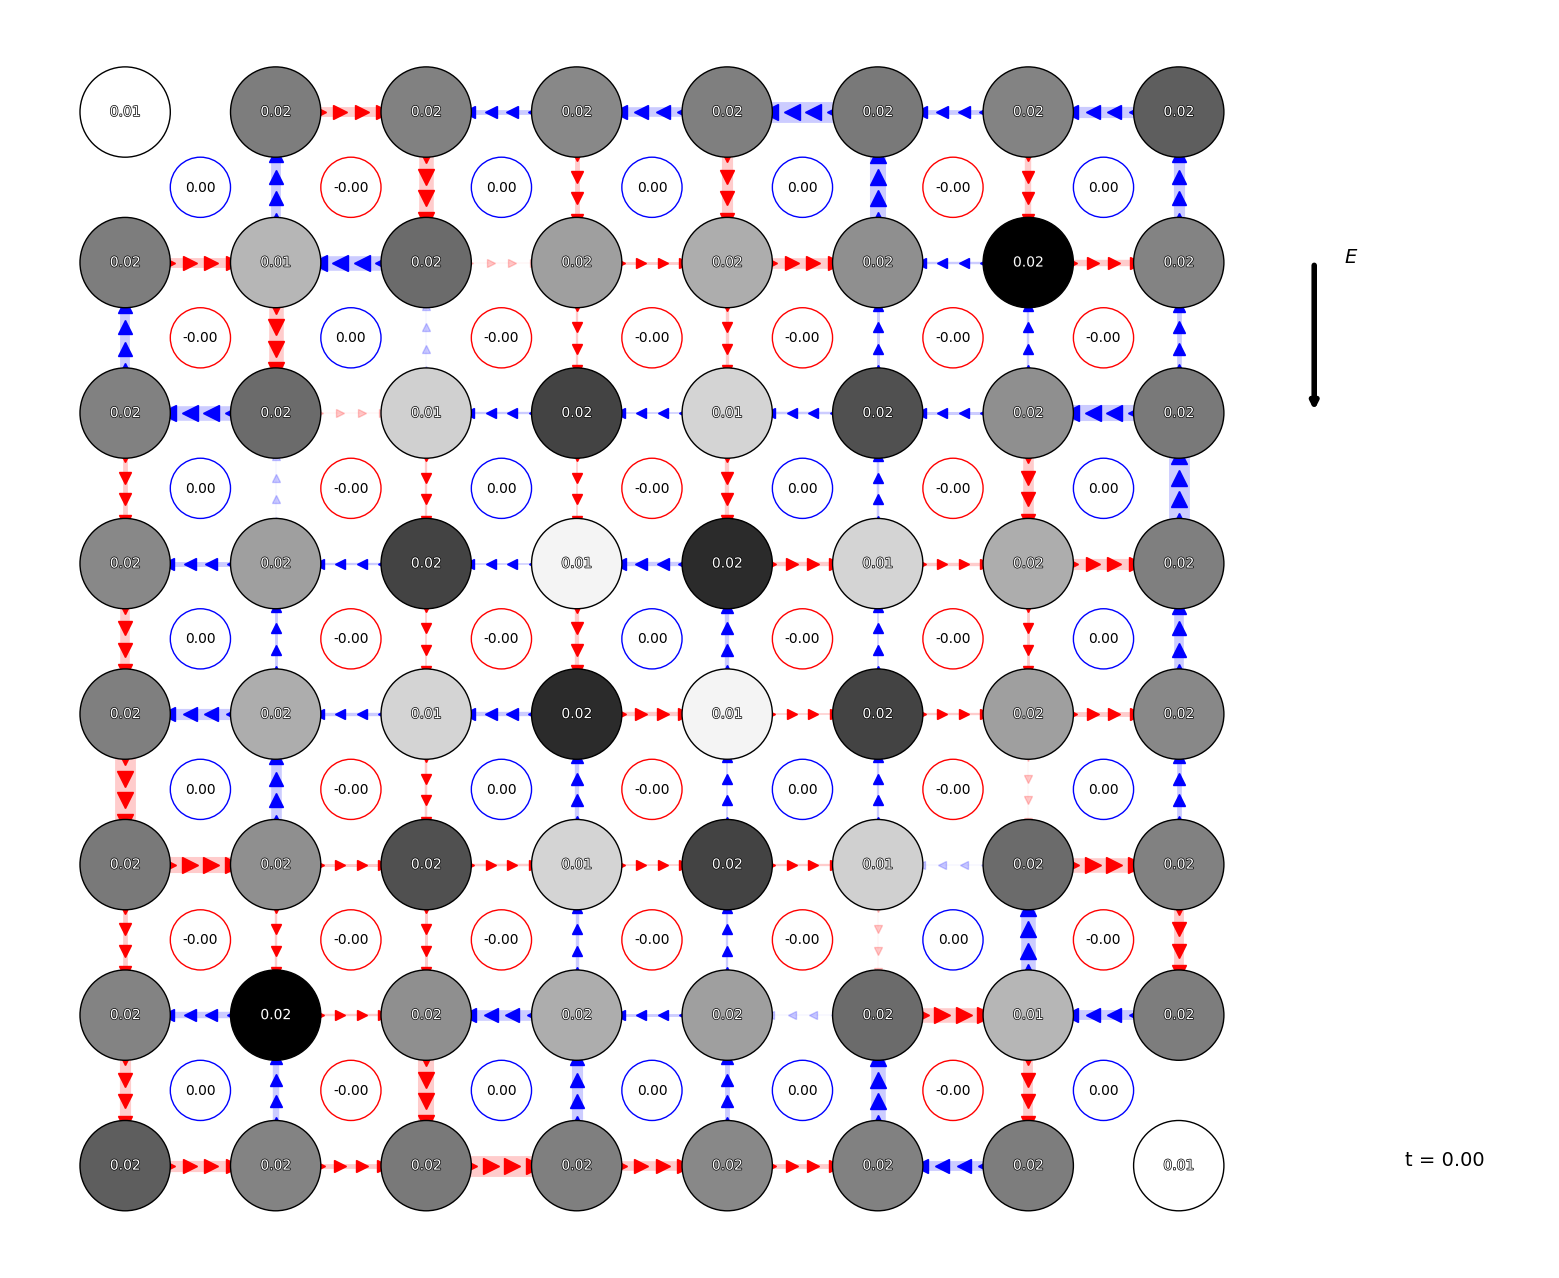

In [7]:
sq.plot_current_density(0)

MovieWriter imagemagick unavailable; using Pillow instead.


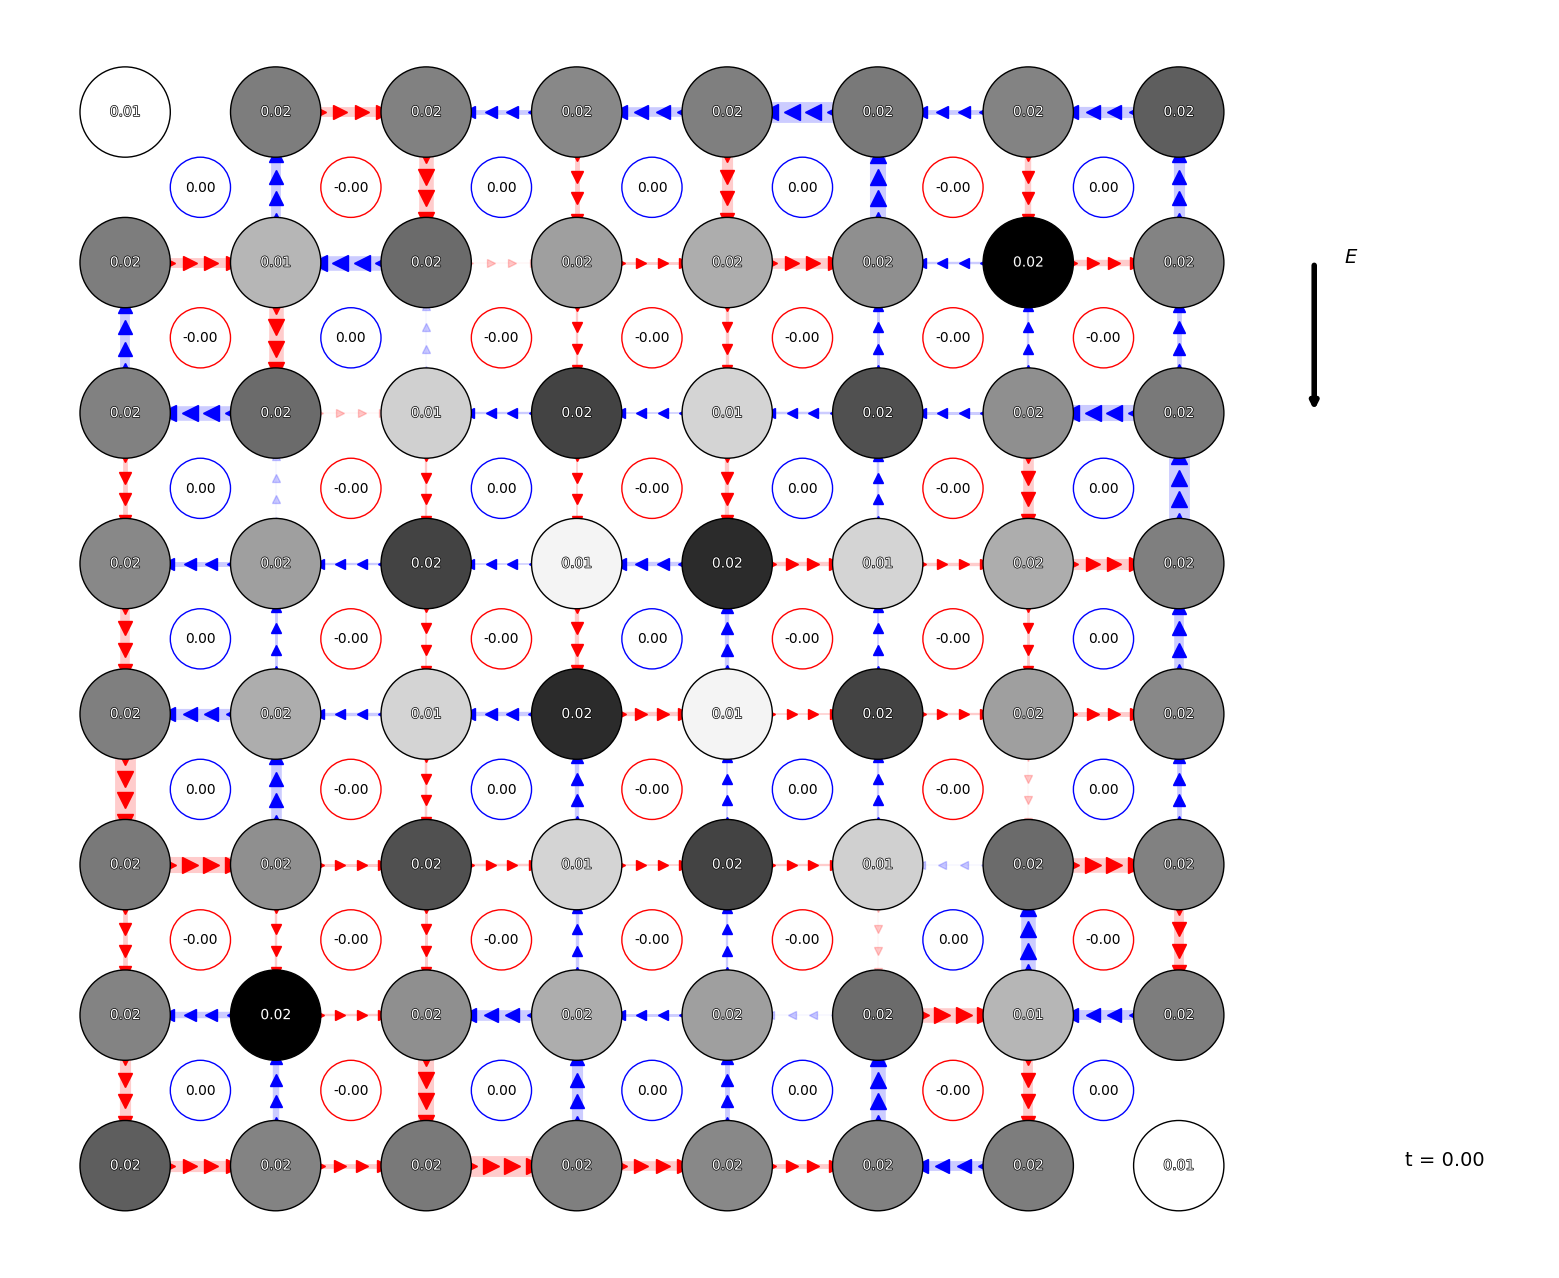

In [8]:
sq.animate_current_density("test_large_square.gif", dpi=100, bitrate=2000, sample_every=8)

In [ ]:
bw = BrickwallLattice(L=6, t_hop=1, E_amplitude=.01, E_dir=np.array([1, 0]), h=2e-4, steps=20_000, initial_occupation=0.5)
bw.evolve()
bw.animate_current_density("test curl bw.gif", sample_every=287, fps=10, dpi=75, bitrate=1500)

In [ ]:
sq = SquareLattice(L=6, t_hop=1j, E_amplitude=0.01, E_dir=np.array([1, 0]), h=0.1, steps=100, initial_occupation=0.5)
sq.evolve()
sq.animate_current_density("test_curl.gif", fps=10, sample_every=2, dpi=75, bitrate=1500)

In [3]:
def test_convergence(T:float, hspace:np.ndarray, lattice: SquareLattice):
    densities = []
    for h in tqdm(hspace):
        lattice.h = h
        lattice.steps = int(T/h)
        lattice.evolve(force_reevolve=True)
        densities.append(np.diag(lattice.get_state(-1)).real)

    return densities

In [20]:
sq = SquareLattice(L=4, t_hop=1, E_amplitude=lambda t: np.cos(t)*0.01, E_dir=np.array([1, 0]), initial_occupation=0.5, h=None, steps=None)

hspace = np.logspace(-5, 0, 30, base=10)
densities = np.array(test_convergence(5, hspace, sq))

Creating Hamiltonians...
Done.
Calculating energy eigenstates...
Done.
50 % of states were set as initially occupied.


100%|██████████| 30/30 [00:32<00:00,  1.09s/it]


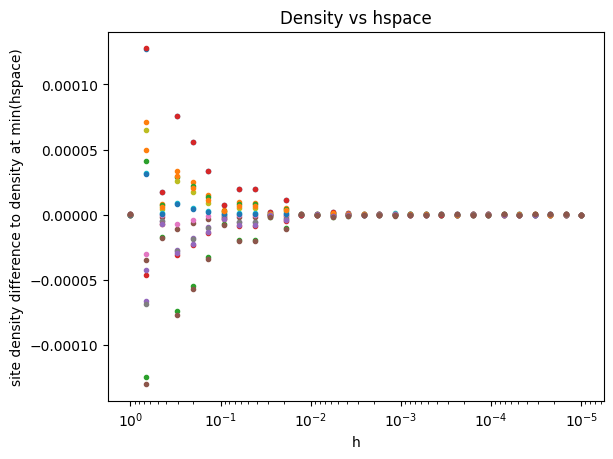

In [21]:
plt.gca().invert_xaxis()
plt.xscale('log')
#plt.yscale('log')

plt.xlabel('h')
plt.ylabel('site density difference to density at min(hspace)')
plt.title('Density vs hspace')

for site in range(sq.L**2):
    plt.plot(hspace, densities[:, site] - densities[:, site][0] , ".")
plt.show()